In [1]:
from torch.autograd import Variable

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [3]:
import VAE_NN
from torchvision import datasets, transforms

In [4]:
from torch.optim import Adam

In [5]:
test = VAE_NN.VAE_Net()

In [6]:
test.cuda()

VAE_Net(
  (ei): Linear(in_features=784, out_features=500)
  (em): Linear(in_features=500, out_features=20)
  (ev): Linear(in_features=500, out_features=20)
  (di): Linear(in_features=20, out_features=500)
  (do): Linear(in_features=500, out_features=784)
)

In [7]:
optimizer = Adam(test.parameters(),lr=1e-3)

In [8]:
train_data,_ = VAE_NN.get_data_loaders(b_size=128)

In [39]:
import time

In [41]:
time.time()

1518228049.172097

In [43]:
t = time.time()
VAE_NN.train(test,optimizer,train_data, VAE_NN.elbo_loss, epochs = 10)
t_e = time.time() - t
print('Seconds for 10 epcohs: %d' % t_e)

Seconds for 10 epcohs: 52


In [20]:
t_data,_ = next(iter(train_data))

In [21]:
t_data = Variable(t_data).view(-1,784)

In [22]:
i = 11

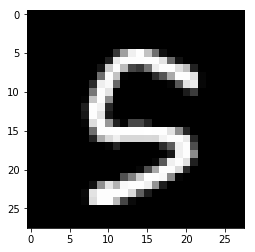

In [25]:
plt.imshow(np.reshape(t_data[i].data.cpu().numpy(),(28,28)), cmap='gray')
plt.show()

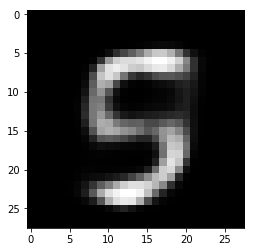

In [33]:
a,b,c = test(t_data[i].cuda())

im_t = a

im_t = im_t.data.cpu().numpy()

plt.imshow(np.reshape(im_t,(28,28)),cmap='gray')
plt.show()

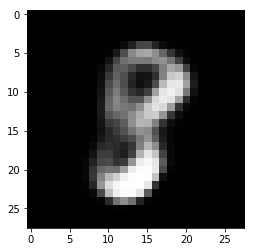

In [38]:
a = test.sample()

a = test.decode(a)

im_t = a

im_t = im_t.data.cpu().numpy()

plt.imshow(np.reshape(im_t,(28,28)),cmap='gray')
plt.show()

In [18]:
torch.randn(10).cuda()


-0.5970
-0.4500
-0.8260
 2.2261
-0.8141
-1.1682
-0.1819
 1.2196
 2.1225
 0.3877
[torch.cuda.FloatTensor of size 10 (GPU 0)]

In [72]:
std = b.mul(0.5).exp_()


In [73]:
std

Variable containing:
 0.9994
 0.9997
 0.9999
 1.0003
 0.9992
 1.0015
 0.9995
 1.0005
 0.9992
 0.9988
 0.9995
 1.0005
 0.9996
 1.0010
 0.9994
 1.0015
 0.9998
 1.0004
 1.0005
 0.9986
[torch.cuda.FloatTensor of size 20 (GPU 0)]

In [74]:
Variable(std.data.new(std.size()).normal_())

Variable containing:
-0.0348
 0.7231
 1.5674
 1.2449
 0.6941
-0.9312
 0.4566
-0.5053
-0.1246
 1.5592
 0.9387
-0.0171
 0.7142
 0.6327
-0.4006
 1.4741
 0.1032
-0.3437
 0.6125
-0.2460
[torch.cuda.FloatTensor of size 20 (GPU 0)]

In [21]:
v.size()

torch.Size([128, 20])

In [47]:
t_m = 0
for mean in m:
    t_m += mean.dot(mean)

In [61]:
ve = v.exp()

In [76]:
v.sum()

Variable containing:
-290.5010
[torch.FloatTensor of size 1]

In [77]:
ve.log()

Variable containing:
 0.0386  0.0834  0.0009  ...  -0.3004 -0.4756 -0.2290
 0.0486  0.0809  0.0016  ...  -0.3021 -0.4997 -0.2592
 0.0419  0.0783  0.0002  ...  -0.3131 -0.4769 -0.2440
          ...             ⋱             ...          
 0.0392  0.1011  0.0137  ...  -0.3390 -0.5280 -0.2393
 0.0541  0.0473 -0.0428  ...  -0.3001 -0.4944 -0.2292
 0.0799  0.0996 -0.0117  ...  -0.2605 -0.5073 -0.2742
[torch.FloatTensor of size 128x20]

In [22]:
v.sum(1).size()

torch.Size([128])

In [25]:
np.exp(0.6113)

1.8428255154387092

In [26]:
v.sum()

Variable containing:
 1.8428
[torch.FloatTensor of size 1]

In [ ]:
F.mse_loss()

In [23]:
m.size()[2]

20

In [51]:
train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.ToTensor()),
                        batch_size=128, shuffle=True)

In [52]:
a = next(iter(train_loader))

In [25]:
b = torch.FloatTensor([20.0]*20)

In [42]:
b**(0.5)


 4.4721
 4.4721
 4.4721
 4.4721
 4.4721
 4.4721
 4.4721
 4.4721
 4.4721
 4.4721
 4.4721
 4.4721
 4.4721
 4.4721
 4.4721
 4.4721
 4.4721
 4.4721
 4.4721
 4.4721
[torch.FloatTensor of size 20]

In [37]:
torch.Tensor.mul(torch.randn(20),b)


 21.4627
 -3.5977
-26.5967
 -9.6946
 22.6051
 -2.6244
-25.5246
-50.0984
-11.8427
-29.2619
 16.8970
  1.0061
-20.1975
 16.6405
 -6.8160
 -7.9877
  1.2436
 12.1576
-30.6637
-37.0371
[torch.FloatTensor of size 20]